In [275]:
#data wrangle
import pandas as pd
import numpy as np
from datetime import datetime

#visuals
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### reading in busfareactivity for ridership analysis

In [276]:
df = pd.read_excel('../resource_files/BusFareBoxActivity_2020.csv')

In [304]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89623 entries, 0 to 89622
Data columns (total 11 columns):
ServiceDateTime        89623 non-null datetime64[ns]
Route                  89623 non-null int64
RouteName              87728 non-null object
CurrentRevenue         89623 non-null float64
Ridership              89623 non-null int64
TokenCount             89623 non-null int64
TicketCount            89623 non-null int64
PassCount              89623 non-null int64
BillCount              89623 non-null int64
UnclassifiedRevenue    89623 non-null float64
DumpCount              89623 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(7), object(1)
memory usage: 7.5+ MB


,ServiceDateTime,Route,RouteName,CurrentRevenue,Ridership,TokenCount,TicketCount,PassCount,BillCount,UnclassifiedRevenue,DumpCount
0,2017-01-01,2,2-BLANCO RD.,510.82,1244,0,0,588,312,20.88,116
1,2017-01-01,3,3-SAN PEDRO,203.93,689,0,0,371,119,9.55,49
2,2017-01-01,4,4-SAN PEDRO,356.58,1377,0,0,671,230,20.44,94
3,2017-01-01,5,5-MC CULLOUGH,224.80,474,0,0,239,124,19.50,64
4,2017-01-01,8,8-N.ST.MARYS,252.29,471,0,0,214,147,6.45,53


#### only looking at the ridership values

In [286]:
subset = df[['ServiceDateTime','Ridership']]
subset.head()

,ServiceDateTime,Ridership
0,2017-01-01,1244
1,2017-01-01,689
2,2017-01-01,1377
3,2017-01-01,474
4,2017-01-01,471


In [287]:
#change dates to actual datetime
subset.ServiceDateTime = pd.to_datetime(subset.ServiceDateTime)

In [288]:
#sum the ridership values up by day, as they are currently separated by route
subset = subset.groupby('ServiceDateTime').sum().reset_index()

In [289]:
subset.head()

,ServiceDateTime,Ridership
0,2017-01-01,45688
1,2017-01-02,74183
2,2017-01-03,110745
3,2017-01-04,98050
4,2017-01-05,104121


In [290]:
subset [subset.ServiceDateTime >= '2020-01-01']

,ServiceDateTime,Ridership
969,2020-01-01,36344
970,2020-01-02,48966
971,2020-01-03,54831
972,2020-01-04,38089
973,2020-01-05,52850
974,2020-01-06,90589
975,2020-01-07,90244
976,2020-01-08,79903
977,2020-01-09,146


> theres only 9 days of 2020 service. removing these values

In [291]:
subset = subset [subset.ServiceDateTime < '2020-01-01']
subset.tail()

,ServiceDateTime,Ridership
964,2019-12-27,79955
965,2019-12-28,58148
966,2019-12-29,49913
967,2019-12-30,78112
968,2019-12-31,77726


In [35]:
subset

,ServiceDateTime,Ridership,Day
0,2017-01-01,1244,Sunday
1,2017-01-01,689,Sunday
2,2017-01-01,1377,Sunday
3,2017-01-01,474,Sunday
4,2017-01-01,471,Sunday
...,...,...,...
89618,2020-01-09,9,Thursday
89619,2020-01-09,7,Thursday
89620,2020-01-09,7,Thursday
89621,2020-01-09,11,Thursday


In [205]:
subset = subset.groupby('ServiceDateTime').sum().reset_index()

In [310]:
#adding in day and year for analyzing
subset['Day'] = subset.ServiceDateTime.dt.strftime('%a')
subset['Year'] = subset.ServiceDateTime.dt.strftime('%Y')
subset['Week'] = subset.ServiceDateTime.dt.strftime('%U')

In [312]:
subset.head(20)

,ServiceDateTime,Ridership,Day,Year,Week
0,2017-01-01,45688,Sun,2017,01
1,2017-01-02,74183,Mon,2017,01
2,2017-01-03,110745,Tue,2017,01
3,2017-01-04,98050,Wed,2017,01
4,2017-01-05,104121,Thu,2017,01
5,2017-01-06,75237,Fri,2017,01
6,2017-01-07,59464,Sat,2017,01
7,2017-01-08,46774,Sun,2017,02
8,2017-01-09,102387,Mon,2017,02
9,2017-01-10,106973,Tue,2017,02


In [ ]:
dd

#### whats the average ridership by day and how does that vary by year? values listed in thousands

In [425]:
df_day = pd.pivot_table(subset, index='Year', columns = 'Day', values='Ridership', aggfunc='mean')
df_day = df_day[['Sun','Mon','Tue','Wed','Thu','Fri','Sat']]
df_day = round(df_day,1)
df_day

Day,Sun,Mon,Tue,Wed,Thu,Fri,Sat
Year,,,,,,,
2017,53903.6,97703.9,101328.1,102541.2,101539.4,101801.0,72618.4
2018,54037.2,93683.2,96745.0,97941.7,98712.1,98172.8,72793.0
2019,51660.6,91143.6,94597.6,93909.2,93639.2,94221.4,69135.5


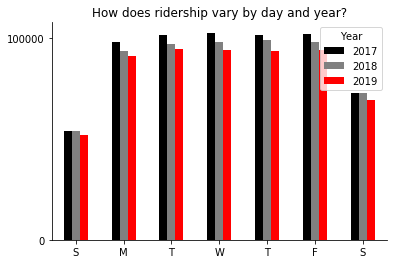

In [458]:
ax = df_day.T.plot.bar(color=('black','grey','red'))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title('How does ridership vary by day and year?')
plt.xlabel('')
# plt.ylabel('Average ridership (thousands)')
plt.xticks(rotation=0)

plt.yticks([0,100_000])
ax.set_xticklabels(['S','M','T','W','T','F','S'])

plt.savefig('ridebydayyear.png', transparent=True)

plt.show()

#### looking at average ridership by day, regardless of year

In [386]:
cats = [ 'Sun','Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
avg_rider = subset.groupby('Day').mean().reindex(cats)
avg_rider

,Ridership
Day,
Sun,53387.834532
Mon,94566.129496
Tue,97895.114286
Wed,98681.333333
Thu,98527.586957
Fri,98566.434783
Sat,71819.036496


#### plot it! 

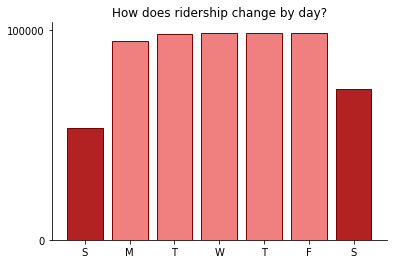

In [457]:
import matplotlib as mpl

fig = plt.figure()

color = ['firebrick','lightcoral','lightcoral','lightcoral','lightcoral','lightcoral']

plt.bar(avg_rider.index, avg_rider.Ridership, color=color, edgecolor='maroon', tick_label=labels)

plt.title('How does ridership change by day?')

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

plt.yticks([0,100_000])

plt.savefig('ridebyday.png', transparent=True)

plt.show()

In [388]:
subset

,ServiceDateTime,Ridership,Day,Year,Week
0,2017-01-01,45688,Sun,2017,01
1,2017-01-02,74183,Mon,2017,01
2,2017-01-03,110745,Tue,2017,01
3,2017-01-04,98050,Wed,2017,01
4,2017-01-05,104121,Thu,2017,01
...,...,...,...,...,...
964,2019-12-27,79955,Fri,2019,51
965,2019-12-28,58148,Sat,2019,51
966,2019-12-29,49913,Sun,2019,52
967,2019-12-30,78112,Mon,2019,52


In [389]:
df_day = pd.pivot_table(subset, index='Year', columns = 'Day', values='Ridership', aggfunc='mean')
df_day = df_day[['Sun','Mon','Tue','Wed','Thu','Fri','Sat']]
df_day = round(df_day/1000,1)
df_day

Day,Sun,Mon,Tue,Wed,Thu,Fri,Sat
Year,,,,,,,
2017,53.9,97.7,101.3,102.5,101.5,101.8,72.6
2018,54.0,93.7,96.7,97.9,98.7,98.2,72.8
2019,51.7,91.1,94.6,93.9,93.6,94.2,69.1


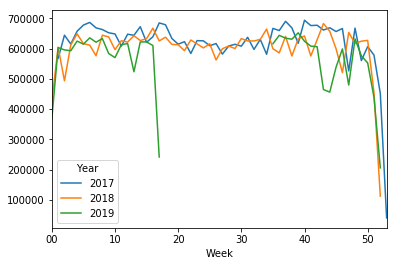

In [390]:
pd.pivot_table(subset, index='Week', columns='Year', values='Ridership', aggfunc='sum').plot()
plt.show()

In [204]:
subset

,ServiceDateTime,Ridership
0,2017-01-01,1244
1,2017-01-01,689
2,2017-01-01,1377
3,2017-01-01,474
4,2017-01-01,471
...,...,...
89618,2020-01-09,9
89619,2020-01-09,7
89620,2020-01-09,7
89621,2020-01-09,11


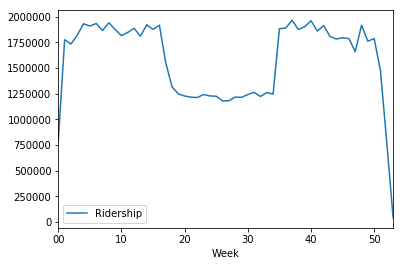

In [352]:
subset.groupby('Week').sum().plot()
plt.show()